In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s1 = pd.Series([1, 2, 5, 8, 9])

In [5]:
s2 = pd.Series(["anuj", "mohit", "kartik"])

In [6]:
s2

0      anuj
1     mohit
2    kartik
dtype: object

In [24]:
d = {"names":["amit", "ravi", "shankar"], "ages": [25, 31, 34]}

df = pd.DataFrame.from_dict(d)

In [25]:
df

,names,ages
0,amit,25
1,ravi,31
2,shankar,34


In [26]:
data = pd.read_csv("../datasets/mnist_train_small.csv")

In [30]:
type(data)

pandas.core.frame.DataFrame

In [31]:
data.head()

,Unnamed: 0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
vals = data.values

In [33]:
type(vals)

numpy.ndarray

In [35]:
vals.shape

(8000, 786)

In [36]:
X = vals[:, 2:]
y = vals[:, 1]

In [52]:
img = X[1].reshape(28, 28)

In [53]:
img.shape

(28, 28)

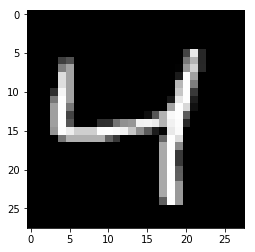

In [54]:
plt.imshow(img, cmap="gray")

In [55]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
class KNN:
    
    def __init__(self, k=10):
        self.X = None
        self.y = None
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, points):
        
        res = []
        
        for point in points:
            res.append(self.predict_point(point))
            
        return np.array(res, dtype=int)
    
    def predict_point(self, point):
        distances = []
        
        for x_item, y_item in zip(self.X, self.y):
            dis = KNN.distance(point, x_item)
            distances.append((dis, y_item))
        
        distances = sorted(distances)
        top = np.array(distances[:self.k])
        
        vals, counts = np.unique(top[:, 1], return_counts=True)
        
        return vals[np.argmax(counts)]
    
    def accuracy(self, X, y):
        return sum(self.predict(X) == y) / len(y)
        
    @classmethod
    def distance(cls, p1, p2):
        return np.sum((p1 - p2) ** 2)
    

In [77]:
model = KNN(100)

In [78]:
model.fit(X_train, y_train)

In [79]:
model.predict(X_test[:10])

array([9, 1, 4, 8, 0, 8, 0, 2, 4, 0])

In [80]:
y_test[:10]

array([9, 1, 4, 8, 0, 8, 2, 2, 4, 8])

In [81]:
model.accuracy(X_test[:50], y_test[:50])

0.9

In [ ]:
from sk